***Importing dependencies***

In [36]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

***Data collection PIMA Diabetes Dataset***

In [6]:
#loading dataset
diabetes_dataset = pd.read_csv('/content/sample_data/diabetes.csv')
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
 diabetes_dataset.shape

(768, 9)

In [8]:
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
diabetes_dataset['Outcome'].value_counts()
#0 -> Non diabetic
#1 -> diabetic

,count
Outcome,
0,500
1,268


In [11]:
diabetes_dataset.groupby("Outcome").mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [13]:
#seperating the data and labels
X = diabetes_dataset.drop(columns='Outcome',axis=1)
Y = diabetes_dataset['Outcome']

In [16]:
print(X)
print(Y)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


***Standard Scalar***

In [17]:
scalar=StandardScaler()
scalar.fit(X)
standardized_data = scalar.transform(X)

In [18]:
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [19]:
X = standardized_data
Y = diabetes_dataset['Outcome']

In [21]:
#train test split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2, stratify=Y ,random_state=2)

In [22]:
print(X.shape, X_train.shape,X_test.shape)

(768, 8) (614, 8) (154, 8)


In [23]:
print(Y.shape, Y_train.shape,Y_test.shape)

(768,) (614,) (154,)


In [24]:
classifier = svm.SVC(kernel='linear')

In [25]:
#now fit the model to the classifier
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

***Model Evaluation***

In [28]:
#Accuracy Score
X_train_acc = classifier.predict(X_train)
train_data_acc = accuracy_score(X_train_acc,Y_train)
print('Accuracy score of train data ', train_data_acc)

X_test_acc = classifier.predict(X_test)
test_data_acc = accuracy_score(X_test_acc,Y_test)
print('Accuracy score of test data ', test_data_acc)

Accuracy score of train data  0.7866449511400652
Accuracy score of test data  0.7727272727272727


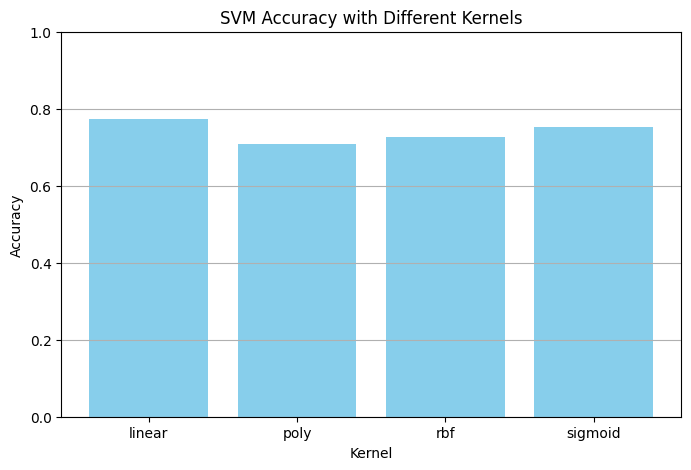

In [38]:
# Define kernels to test
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
accuracies = []

# Train SVM with different kernels
for kernel in kernels:
    model = svm.SVC(kernel=kernel)
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_pred,Y_test)
    accuracies.append(acc)

# Plotting
plt.figure(figsize=(8, 5))
plt.bar(kernels, accuracies, color='skyblue')
plt.title("SVM Accuracy with Different Kernels")
plt.xlabel("Kernel")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()

***Making a predictive attempt on dummy data***

In [34]:
input_data = (8,183,64,0,0,23.3,0.672,32)
#convert to numpy array
#changing data type to numpy array
input_data_as_numpy_array = np.asarray(input_data)
#reshape the data
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)


std_data = scalar.transform(input_data_reshaped)
print(std_data)
prediction = classifier.predict(std_data)
print(prediction)

if(prediction[0]=='1'):
  print('this is a diabetic')
else:
  print('this is a non diabetic')

[[ 1.23388019  1.94372388 -0.26394125 -1.28821221 -0.69289057 -1.10325546
   0.60439732 -0.10558415]]
[1]
this is a non diabetic


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
